In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
sns.set(style='darkgrid')

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [177]:
df = pd.read_csv('./실습데이터/환율_종합.csv', parse_dates=["통계표"],dtype={'8.8.1.1 주요국통화의 대원화 환율': str} ,encoding='cp949')

In [178]:
df.describe()

,통계표,8.8.1.1 주요국통화의 대원화 환율,8.8.1.1 주요국통화의 대원화 환율.1,8.8.1.1 주요국통화의 대원화 환율.2,8.8.1.1 주요국통화의 대원화 환율.3
count,14012,14009,1190,11854,6817
unique,14012,958,33,1293,912
top,2006/12/19,484,168,324,"1,307"
freq,1,1495,119,52,26


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14005 entries, 0 to 14004
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   통계표                    14005 non-null  datetime64[ns]
 1   8.8.1.1 주요국통화의 대원화 환율  14005 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 219.0+ KB


In [152]:
df.head(5)

,통계표,8.8.1.1 주요국통화의 대원화 환율
0,1970-01-05,304.45
1,1970-01-06,304.45
2,1970-01-07,304.45
3,1970-01-08,304.45
4,1970-01-09,304.35


In [153]:
df = df.rename({'통계표':'일자', '8.8.1.1 주요국통화의 대원화 환율':'환율'}, axis='columns')

In [154]:
df

,일자,환율
0,1970-01-05,304.45
1,1970-01-06,304.45
2,1970-01-07,304.45
3,1970-01-08,304.45
4,1970-01-09,304.35
...,...,...
14000,2020-10-22,"1,133.70"
14001,2020-10-23,"1,134.10"
14002,2020-10-26,"1,134.60"
14003,2020-10-27,"1,129.10"


In [155]:
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')

In [156]:
df['연도'] = df['일자'].dt.year
df['월'] = df['일자'].dt.month
df['일'] = df['일자'].dt.day

In [161]:
for i in range(len(df)):
    df.환율[i] = df.환율[i].replace(',', '')

In [162]:
df[df['환율']==df['환율'].max()].index
print(df[df['환율']==df['환율'].max()].index, df['환율'][10124])

Int64Index([10124], dtype='int64') 999.9


In [163]:
df.dtypes

일자    datetime64[ns]
환율            object
연도             int64
월              int64
일              int64
dtype: object

In [164]:
df[['환율']] = df[['환율']].apply(pd.to_numeric)

In [165]:
df

,일자,환율,연도,월,일
0,1970-01-05,304.45,1970,1,5
1,1970-01-06,304.45,1970,1,6
2,1970-01-07,304.45,1970,1,7
3,1970-01-08,304.45,1970,1,8
4,1970-01-09,304.35,1970,1,9
...,...,...,...,...,...
14000,2020-10-22,1133.70,2020,10,22
14001,2020-10-23,1134.10,2020,10,23
14002,2020-10-26,1134.60,2020,10,26
14003,2020-10-27,1129.10,2020,10,27


Text(0, 0.5, 'price')

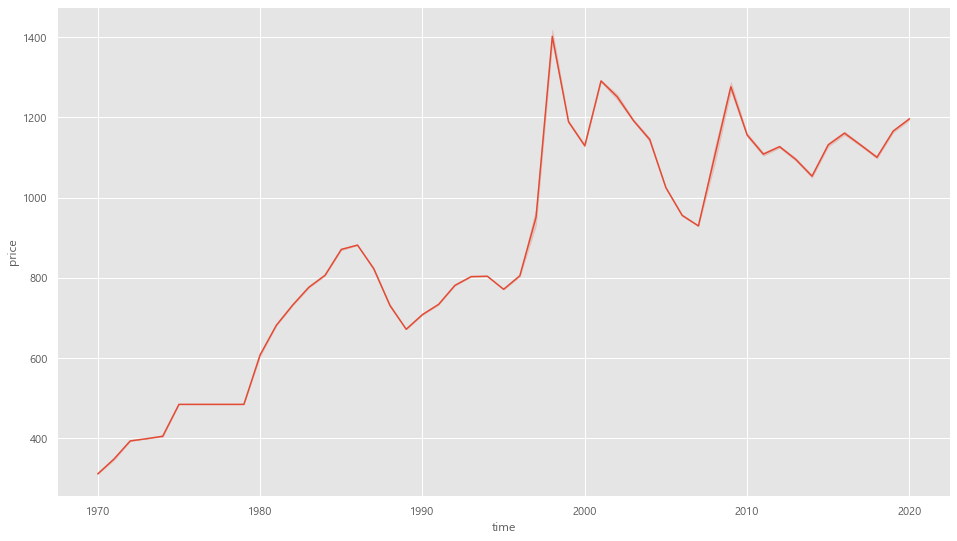

In [166]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['환율'], x=df['연도'])
plt.xlabel('time')
plt.ylabel('price')

In [170]:
train = df[:-200]

In [172]:
test = df[-200:]

In [173]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list)

In [175]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train,test, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [13805, 200]

In [176]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "c:\users\694\anaconda3\envs\tf_study\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed: 지정된 모듈을 찾을 수 없습니다.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.